In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import arff
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding,Dropout, Activation
import matplotlib.pyplot as plt

In [39]:
path="C:/Users/HP/Documents/CyberProject/"
dataOrignal=pd.read_csv(path+"training-set.csv")


In [21]:
dataOrignal.head(10)

Tick#  offsetTime  IMU_ATTI(0):numSats  IMU_ATTI(0):barometer:Raw   
0  339062105       0.000                   14                  1188.3093  \
1  339314363       0.066                   14                  1188.1595   
2  339465911       0.105                   14                  1188.1595   
3  339648466       0.152                   14                  1188.2122   
4  339821470       0.197                   14                  1188.2122   
5  339955466       0.232                   14                  1188.2201   
6  340233911       0.304                   14                  1188.2201   
7  340466455       0.365                   14                  1188.1620   
8  340599300       0.399                   14                  1188.1620   
9  340800525       0.452                   14                  1188.3047   

   IMU_ATTI(0):barometer:Smooth  IMU_ATTI(0):accel:X  IMU_ATTI(0):accel:Y   
0                     1188.0585            -0.007624            -0.162505  \
1                     1188.0468            -0.007572            -0.161164   
2                     1188.0468            -0.007572            -0.161164   
3                     1188.0359            -0.008646            -0.153160   
4                     1188.0359            -0.008646            -0.153160   
5                     1188.0261            -0.007623            -0.162020   
6                     1188.0261            -0.007623            -0.162020   
7                     1188.0109            -0.007363            -0.161693   
8                     1188.0109            -0.007363            -0.161693   
9                     1187.9961            -0.008370            -0.162585   

   IMU_ATTI(0):accel:Z  IMU_ATTI(0):accel:Composite  IMU_ATTI(0):gyro:X  ...   
0            -0.980750                     0.994151           -0.013848  ...  \
1            -0.981163                     0.994339            0.049079  ...   
2            -0.981163                     0.994339            0.049079  ...   
3            -0.982913                     0.994812            0.535372  ...   
4            -0.982913                     0.994812            0.535372  ...   
5            -0.981557                     0.994868            0.983324  ...   
6            -0.981557                     0.994868            0.983324  ...   
7            -0.981646                     0.994901            0.284040  ...   
8            -0.981646                     0.994901            0.284040  ...   
9            -0.982437                     0.995834           -0.513324  ...   

   MotorCtrl:PWM:RFront  MotorCtrl:PWM:LFront  MotorCtrl:PWM:LBack   
0                   NaN                   NaN                  NaN  \
1                   NaN                   NaN                  NaN   
2                   NaN                   NaN                  NaN   
3                   NaN                   NaN                  NaN   
4                   NaN                   NaN                  NaN   
5                  1.46                  1.46                 1.46   
6                  1.46                  1.46                 1.46   
7                  1.46                  1.46                 1.46   
8                  2.79                  2.79                 2.79   
9                  2.79                  2.79                 2.79   

   MotorCtrl:PWM:RBack  AirCraftCondition:fsmState   
0                  NaN                           0  \
1                  NaN                           0   
2                  NaN                           0   
3                  NaN                           1   
4                  NaN                           1   
5                 1.46                           1   
6                 1.46                           1   
7                 1.46                           1   
8                 2.79                           1   
9                 2.79                           1   

   AirCraftCondition:nearGround  AirCraftCondition:landState   
0          

In [22]:
#Convert non numerical values into categorical integers
data= dataOrignal.apply(lambda x: pd.Categorical(x).codes if x.dtype == 'object' else x)

In [23]:
data.head()


Tick#  offsetTime  IMU_ATTI(0):numSats  IMU_ATTI(0):barometer:Raw   
0  339062105       0.000                   14                  1188.3093  \
1  339314363       0.066                   14                  1188.1595   
2  339465911       0.105                   14                  1188.1595   
3  339648466       0.152                   14                  1188.2122   
4  339821470       0.197                   14                  1188.2122   

   IMU_ATTI(0):barometer:Smooth  IMU_ATTI(0):accel:X  IMU_ATTI(0):accel:Y   
0                     1188.0585            -0.007624            -0.162505  \
1                     1188.0468            -0.007572            -0.161164   
2                     1188.0468            -0.007572            -0.161164   
3                     1188.0359            -0.008646            -0.153160   
4                     1188.0359            -0.008646            -0.153160   

   IMU_ATTI(0):accel:Z  IMU_ATTI(0):accel:Composite  IMU_ATTI(0):gyro:X  ...   
0            -0.980750                     0.994151           -0.013848  ...  \
1            -0.981163                     0.994339            0.049079  ...   
2            -0.981163                     0.994339            0.049079  ...   
3            -0.982913                     0.994812            0.535372  ...   
4            -0.982913                     0.994812            0.535372  ...   

   MotorCtrl:PWM:RFront  MotorCtrl:PWM:LFront  MotorCtrl:PWM:LBack   
0                   NaN                   NaN                  NaN  \
1                   NaN                   NaN                  NaN   
2                   NaN                   NaN                  NaN   
3                   NaN                   NaN                  NaN   
4                   NaN                   NaN                  NaN   

   MotorCtrl:PWM:RBack  AirCraftCondition:fsmState   
0                  NaN                           0  \
1                  NaN                           0   
2                  NaN                           0   
3                  NaN                           1   
4                  NaN                           1   

   AirCraftCondition:nearGround  AirCraftCondition:landState   
0                          True                            1  \
1                          True                            1   
2                          True                            1   
3                          True                            1   
4                          True                            1   

   AirCraftCondition:UP_acc_t  AirCraftCondition:UP_TF_t  Operating_Phase  
0                         0.0                          0                3  
1                         0.0                          0                3  
2                         0.0                          0                3  
3                         0.0                          0                3  
4                         0.0                          0                3  

[5 rows x 142 columns]

In [24]:
missing_values_list = data.isnull().sum().tolist()
column_names = data.columns.tolist()

for col, missing_count in zip(column_names, missing_values_list):
    print(f"Column '{col}' : {missing_count} missing values.")

Column 'Tick#' : 0 missing values.
Column 'offsetTime' : 0 missing values.
Column 'IMU_ATTI(0):numSats' : 0 missing values.
Column 'IMU_ATTI(0):barometer:Raw' : 0 missing values.
Column 'IMU_ATTI(0):barometer:Smooth' : 0 missing values.
Column 'IMU_ATTI(0):accel:X' : 0 missing values.
Column 'IMU_ATTI(0):accel:Y' : 0 missing values.
Column 'IMU_ATTI(0):accel:Z' : 0 missing values.
Column 'IMU_ATTI(0):accel:Composite' : 0 missing values.
Column 'IMU_ATTI(0):gyro:X' : 0 missing values.
Column 'IMU_ATTI(0):gyro:Y' : 0 missing values.
Column 'IMU_ATTI(0):gyro:Z' : 0 missing values.
Column 'IMU_ATTI(0):gyro:Composite' : 0 missing values.
Column 'IMU_ATTI(0):mag:X' : 0 missing values.
Column 'IMU_ATTI(0):mag:Y' : 0 missing values.
Column 'IMU_ATTI(0):mag:Z' : 0 missing values.
Column 'IMU_ATTI(0):mag:Mod' : 0 missing values.
Column 'IMU_ATTI(0):velN' : 0 missing values.
Column 'IMU_ATTI(0):velE' : 0 missing values.
Column 'IMU_ATTI(0):velD' : 0 missing values.
Column 'IMU_ATTI(0):velComposit

In [25]:
data=data.drop('General:absoluteHeight',axis=1)


In [34]:
median_value = data['OA:frontDistance'].median()
# Replace missing values with the median for frontDistance columns
data['OA:frontDistance'].interpolate()
#Drop rows with empty values for column other than frontDistance
data_cleaned = data.dropna()
zero_var_columns = data_cleaned.columns[data_cleaned.nunique() == 1]
data_cleaned = data_cleaned.drop(zero_var_columns, axis=1)

In [36]:
data_cleaned.to_csv()

',Tick#,offsetTime,IMU_ATTI(0):numSats,IMU_ATTI(0):barometer:Raw,IMU_ATTI(0):barometer:Smooth,IMU_ATTI(0):accel:X,IMU_ATTI(0):accel:Y,IMU_ATTI(0):accel:Z,IMU_ATTI(0):accel:Composite,IMU_ATTI(0):gyro:X,IMU_ATTI(0):gyro:Y,IMU_ATTI(0):gyro:Z,IMU_ATTI(0):gyro:Composite,IMU_ATTI(0):mag:X,IMU_ATTI(0):mag:Y,IMU_ATTI(0):mag:Z,IMU_ATTI(0):mag:Mod,IMU_ATTI(0):velN,IMU_ATTI(0):velE,IMU_ATTI(0):velD,IMU_ATTI(0):velComposite,IMU_ATTI(0):velH,IMU_ATTI(0):GPS-H,IMU_ATTI(0):roll,IMU_ATTI(0):pitch,IMU_ATTI(0):yaw,IMU_ATTI(0):yaw360,IMU_ATTI(0):totalGyro:Z,IMU_ATTI(0):totalGyro:X,IMU_ATTI(0):totalGyro:Y,IMU_ATTI(0):magYaw,IMU_ATTI(0):directionOfTravel[mag],IMU_ATTI(0):directionOfTravel[true],IMU_ATTI(0):temperature,General:relativeHeight,GPS(0):Time,GPS:dateTimeStamp,GPS(0):heightMSL,GPS(0):hDOP,GPS(0):pDOP,GPS(0):sAcc,GPS(0):numGPS,GPS(0):numGLNAS,GPS(0):numSV,GPS(0):velN,GPS(0):velE,GPS(0):velD,RC:Aileron,RC:Elevator,RC:Rudder,RC:Throttle,OA:frontDistance,Motor:Speed:RFront,Motor:Speed:LFront,Motor:Sp

In [28]:
#Get variance of the data 
for col, var in zip(column_names, data_cleaned.var().to_list()):
    print(f"Column '{col}' : {var} var: .")

Column 'Tick#' : 7.37831905990394e+16 var: .
Column 'offsetTime' : 4977.7832623986915 var: .
Column 'IMU_ATTI(0):numSats' : 0.461806520649113 var: .
Column 'IMU_ATTI(0):barometer:Raw' : 28.865426258205208 var: .
Column 'IMU_ATTI(0):barometer:Smooth' : 32.992642913608606 var: .
Column 'IMU_ATTI(0):accel:X' : 0.0031730514419270137 var: .
Column 'IMU_ATTI(0):accel:Y' : 0.005609735905285648 var: .
Column 'IMU_ATTI(0):accel:Z' : 0.01987609074219339 var: .
Column 'IMU_ATTI(0):accel:Composite' : 0.01956835520946818 var: .
Column 'IMU_ATTI(0):gyro:X' : 631.2425547800688 var: .
Column 'IMU_ATTI(0):gyro:Y' : 661.6559094321843 var: .
Column 'IMU_ATTI(0):gyro:Z' : 272.99278168017275 var: .
Column 'IMU_ATTI(0):gyro:Composite' : 820.9683369546642 var: .
Column 'IMU_ATTI(0):mag:X' : 22931.135968903738 var: .
Column 'IMU_ATTI(0):mag:Y' : 26158.69999455141 var: .
Column 'IMU_ATTI(0):mag:Z' : 3230.1791776701702 var: .
Column 'IMU_ATTI(0):mag:Mod' : 528.7975931553324 var: .
Column 'IMU_ATTI(0):velN' : 0.

In [29]:
#Separate X and Y
y=data_cleaned['Operating_Phase']
X=data_cleaned.drop('Operating_Phase',axis=1)


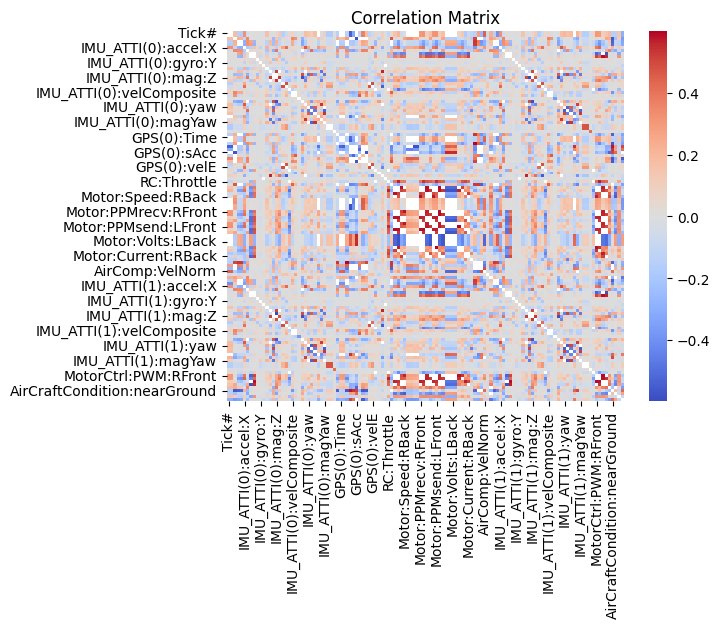

In [30]:
#Plot correlation matrix
correlation_matrix = pd.concat([X, y], axis=1).corr()
mask = correlation_matrix.abs() > 0.6  # Adjust the threshold as needed
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", mask=mask)
plt.title('Correlation Matrix')
plt.show()

In [33]:
correlations = X.corrwith(y)

# Sort the correlations in descending order
sorted_correlations = correlations.abs().sort_values(ascending=False)
for col, corr in zip(column_names, sorted_correlations):
    print(f"Column '{col}' : {corr} .")


Column 'Tick#' : 0.6078218260221563 .
Column 'offsetTime' : 0.5469921210781918 .
Column 'IMU_ATTI(0):numSats' : 0.5054771847433717 .
Column 'IMU_ATTI(0):barometer:Raw' : 0.4676527565146721 .
Column 'IMU_ATTI(0):barometer:Smooth' : 0.4240541689673542 .
Column 'IMU_ATTI(0):accel:X' : 0.41352212940776617 .
Column 'IMU_ATTI(0):accel:Y' : 0.3813178329672394 .
Column 'IMU_ATTI(0):accel:Z' : 0.37910298495422773 .
Column 'IMU_ATTI(0):accel:Composite' : 0.3780493151146658 .
Column 'IMU_ATTI(0):gyro:X' : 0.3757247388621513 .
Column 'IMU_ATTI(0):gyro:Y' : 0.3645374156537462 .
Column 'IMU_ATTI(0):gyro:Z' : 0.36128522541778796 .
Column 'IMU_ATTI(0):gyro:Composite' : 0.3610461941086441 .
Column 'IMU_ATTI(0):mag:X' : 0.3609419525976609 .
Column 'IMU_ATTI(0):mag:Y' : 0.34547583607113186 .
Column 'IMU_ATTI(0):mag:Z' : 0.3452139637766923 .
Column 'IMU_ATTI(0):mag:Mod' : 0.3333139433770589 .
Column 'IMU_ATTI(0):velN' : 0.33331385669561875 .
Column 'IMU_ATTI(0):velE' : 0.3318480085036903 .
Column 'IMU_ATT

In [32]:
print(f"Range is : {data_cleaned['Tick#'].min()} - {data_cleaned['Tick#'].max()}")

Range is : 339955466 - 1299063252
